unique values:  10000 estimated unique values:  10575.202099619932 relative error:  0.05752020996199317
unique values:  20000 estimated unique values:  20386.552568354353 relative error:  0.01932762841771764
unique values:  30000 estimated unique values:  30266.207463271585 relative error:  0.008873582109052829
unique values:  40000 estimated unique values:  40120.35943980087 relative error:  0.003008985995021794
unique values:  50000 estimated unique values:  51929.393534408264 relative error:  0.03858787068816528
unique values:  60000 estimated unique values:  62911.60837531292 relative error:  0.04852680625521534
unique values:  70000 estimated unique values:  70493.54685849405 relative error:  0.007050669407057908
unique values:  80000 estimated unique values:  78499.38717124004 relative error:  0.01875766035949946
unique values:  90000 estimated unique values:  88144.09969763813 relative error:  0.02062111447068746
unique values:  99996 estimated unique values:  96692.768241127 re

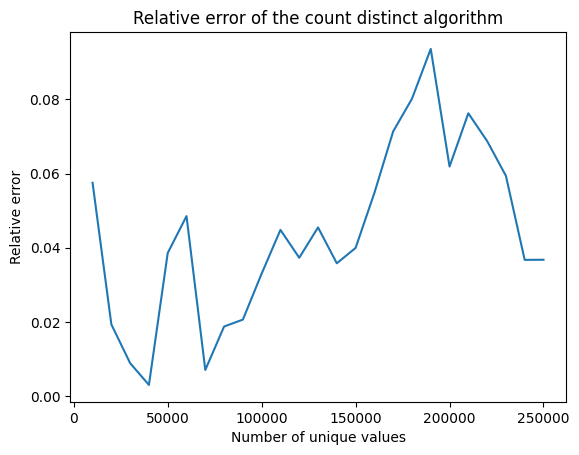

In [1]:
import random
import hashlib
import matplotlib.pyplot as plt

def normalized_hash(value):
    return int(hashlib.md5(str(value).encode()).hexdigest(), 16) / (2**128 - 1)

def count_unique(stream, k):
    X = [1 for _ in range(k)]
    for value in stream:
        h = normalized_hash(value)
        if h < X[k-1] and h not in X:
            X.append(h)
            X.sort()
            X.pop(-1)
    L = X.count(1)
    if L > 0:
        return k - L
    else:
        return (k-1)/X[k-1]

k = 400
counts = [10000 * i for i in range(1, 26)]
estimates = []
relative_errors = []
for count in counts:
    stream = [random.randint(1, count) for _ in range(1000000)]
    count = len(set(stream))
    estimates.append(count_unique(stream, k))
    relative_errors.append(abs(estimates[-1] - count) / count)
    print("unique values: ", count, "estimated unique values: ", estimates[-1], "relative error: ", relative_errors[-1])

plt.plot(counts, relative_errors)
plt.xlabel("Number of unique values")
plt.ylabel("Relative error")
plt.title("Relative error of the count distinct algorithm")
plt.show()

unique values:  10000 estimated unique values:  9916.049997396693 relative error:  0.008395000260330744
unique values:  20000 estimated unique values:  19818.09817769566 relative error:  0.009095091115216928
unique values:  30000 estimated unique values:  31384.462995751906 relative error:  0.04614876652506355
unique values:  40000 estimated unique values:  38976.54924075032 relative error:  0.025586268981242027
unique values:  50000 estimated unique values:  48488.74659146405 relative error:  0.030225068170719023
unique values:  60000 estimated unique values:  59772.50780727942 relative error:  0.0037915365453429937
unique values:  70000 estimated unique values:  71045.75041103536 relative error:  0.014939291586219457
unique values:  80000 estimated unique values:  80766.63005298047 relative error:  0.0095828756622559
unique values:  89998 estimated unique values:  88678.34121386822 relative error:  0.014663201250380922
unique values:  99997 estimated unique values:  97061.98969017096

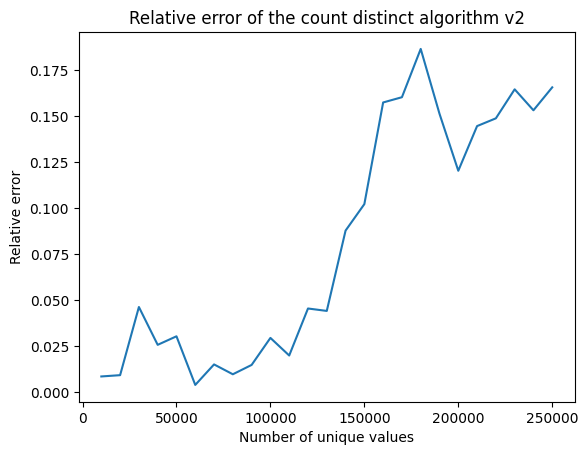

In [2]:
seed = 42069

def count_unique_v2(stream, k):
    random.seed(seed)
    s1 = []
    s2 = []

    for value in stream:
        r = random.random()
        if r < 1/2:
            s1.append(value)
        else:
            s2.append(value)

    return (count_unique(s1, k // 2) + count_unique(s2, k // 2)) / 2

estimates_v2 = []
relative_errors_v2 = []

for count in counts:
    stream = [random.randint(1, count) for _ in range(1000000)]
    count = len(set(stream))
    estimates_v2.append(count_unique_v2(stream, k))
    relative_errors_v2.append(abs(estimates_v2[-1] - count) / count)
    print("unique values: ", count, "estimated unique values: ", estimates_v2[-1], "relative error: ", relative_errors_v2[-1])

plt.plot(counts, relative_errors_v2)
plt.xlabel("Number of unique values")
plt.ylabel("Relative error")
plt.title("Relative error of the count distinct algorithm v2")
plt.show()